# Expected resolution for the spectrum

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : March 13th 2017
- update :



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

In [2]:
from scipy.interpolate import interp1d

In [3]:
import libLSSTMagnitude as magnit

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Constants for conversions

In [5]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [6]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [7]:
deg_to_rad=np.pi/180.

In [8]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [9]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [10]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Grating

In [11]:
Ronchi_r=200 # number of lines per mm
Ronchi_a=mm_to_m/Ronchi_r  # line spacing in meter unit
Ronchi_size=2*inch_to_mm*mm_to_m # size of Ronchi Grating in meter
Ronchi_N=Ronchi_size/Ronchi_a   # total number of lines (not used)

#### Filter

In [12]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD Detector

In [13]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [14]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [15]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


# Ymax

In [16]:
ymax=1./2.*Filt_D*Tel_Diameter/Tel_Focal_Length*m_to_mm  # mm

In [17]:
print ' ymax = ',ymax,' mm'

 ymax =  2.06035714286  mm


# Resolution 

In [18]:
ResWL=2.*Ronchi_r*ymax

In [19]:
def ComputeWlRes(wl):
    return wl/ResWL

# Atmosphere


In [20]:
path_atm_rt_us_sc="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sc/out"

In [21]:
path_atm_rt_us_ab_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/oz/out'
path_atm_rt_us_ab_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/ab/rt/wv/out'

In [22]:
path_atm_rt_us_sa_rt_oz='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/oz/out'
path_atm_rt_us_sa_rt_pwv='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/PC5AtmosphericExtinction/LibRadTran/simulations/RT/2.0/LS/pp/us/sa/rt/wv/out'

In [23]:
sc_rt_path=os.path.join(path_atm_rt_us_sc,'RT_LS_pp_us_sc_rt_z10.OUT')
abs_rt_pwv_path=os.path.join(path_atm_rt_us_ab_rt_pwv,'RT_LS_pp_us_ab_rt_z10_wv40.OUT')
abs_rt_oz_path=os.path.join(path_atm_rt_us_ab_rt_oz,'RT_LS_pp_us_ab_rt_z10_oz32.OUT')
sa_rt_pwv_path=os.path.join(path_atm_rt_us_sa_rt_pwv,'RT_LS_pp_us_sa_rt_z10_wv40.OUT')
sa_rt_oz_path=os.path.join(path_atm_rt_us_sa_rt_oz,'RT_LS_pp_us_sa_rt_z10_oz32.OUT')

In [24]:
data1=np.loadtxt(sc_rt_path)
data2=np.loadtxt(abs_rt_pwv_path)
data3=np.loadtxt(abs_rt_oz_path)
data4=np.loadtxt(sa_rt_pwv_path)
data5=np.loadtxt(sa_rt_oz_path)

In [25]:
x_rt_1=data1[:,0]   # pure scatering
y_rt_1=data1[:,1]

x_rt_2=data2[:,0]   # pure absorption (H2O = 4mm) 
y_rt_2=data2[:,1]

x_rt_3=data3[:,0]   # pure absorption (OZ = 320 Db) 
y_rt_3=data3[:,1]

x_rt_4=data4[:,0]   # Both absorption and scattering (H2O = 4 mm)
y_rt_4=data4[:,1]

x_rt_5=data5[:,0]   # Both absorption and scattering (OZ = 320 mm)
y_rt_5=data5[:,1]

In [26]:
y_rt_6=y_rt_1*y_rt_2
y_rt_7=y_rt_1*y_rt_3

In [27]:
def Aerosols(x,y,lambda0=500.,tau0=0.05,alpha0=1.5,z=1):
    extinction_rate=tau0*np.power(lambda0/x,alpha0)
    return y*np.exp(-extinction_rate*z)

In [28]:
y_aerosols=Aerosols(x_rt_4,y_rt_4,lambda0=500.,tau0=0.05,alpha0=1,z=1)

In [29]:
ratio=y_aerosols/y_rt_4

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


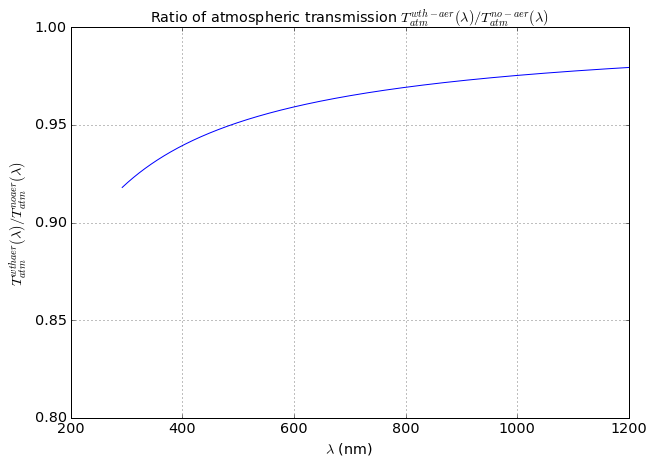

In [30]:
plt.plot(x_rt_4,ratio)
plt.ylim(0.8,1)
plt.title("Ratio of atmospheric transmission $T_{atm}^{wth-aer}(\lambda)/T_{atm}^{no-aer}(\lambda)$ ")
plt.ylabel("$T_{atm}^{wth aer}(\lambda)/T_{atm}^{no aer}(\lambda)$")
plt.xlabel("$\lambda$ (nm) ")
plt.grid(True)

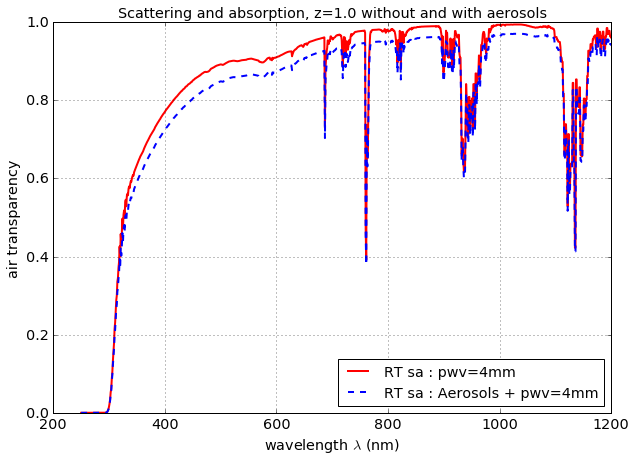

In [31]:
plt.title('Scattering and absorption, z=1.0 without and with aerosols')
plt.plot(x_rt_4,y_rt_4,'r-',lw=2,label = 'RT sa : pwv=4mm ')
#plt.plot(x_rt_5,y_rt_5,'b-',lw=2,label = 'RT sa : oz=320 Db')
#plt.plot(x_rt_1,y_rt_6,'g-',lw=2,label = 'RT sc*abs : pwv=4mm')
#plt.plot(x_rt_1,y_rt_7,'m-',lw=2,label = 'RT sc*abs : oz=320 Db')
plt.plot(x_rt_4,y_aerosols,'b--',lw=2,label = 'RT sa : Aerosols + pwv=4mm')
plt.legend(loc=4)
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("air transparency")
plt.grid(True)

# SED

In [32]:
wl,sed=magnit.MakeSED(lambda_min=300.,lambda_max=1099.,dlambda=1.,slope=-1)

In [33]:
flt=magnit.Filter()    
wl_u,u=flt.get_u_tr()
wl_g,g=flt.get_g_tr()
wl_r,r=flt.get_r_tr()
wl_i,i=flt.get_i_tr()
wl_z,z=flt.get_z_tr()
wl_y4,y4=flt.get_y4_tr()

In [34]:
mag=magnit.LSST_Magnitude() 

In [35]:
fl1_u_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_u,u)
fl1_g_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_g,g)
fl1_r_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_r,r)
fl1_i_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_i,i)
fl1_z_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_z,z)
fl1_y4_rt=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_rt_4,wl_y4,y4)

In [36]:
fl1_u_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_u,u)
fl1_g_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_g,g)
fl1_r_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_r,r)
fl1_i_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_i,i)
fl1_z_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_z,z)
fl1_y4_rt_aer=mag.ComputeSEDxAtmxFilt(wl,sed,x_rt_4,y_aerosols,wl_y4,y4)

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


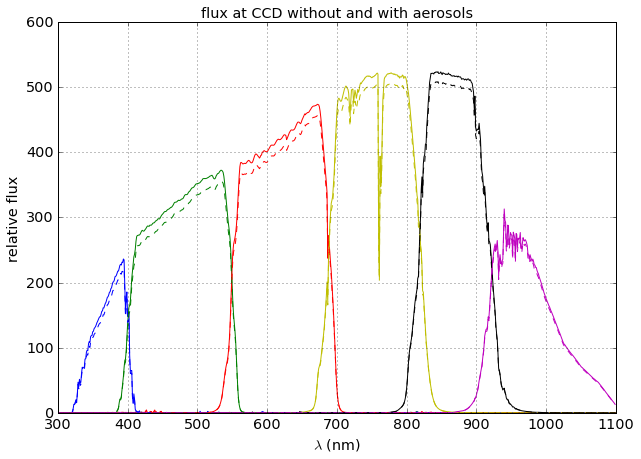

In [37]:
plt.plot(wl,fl1_u_rt,'b-')
plt.plot(wl,fl1_g_rt,'g-')
plt.plot(wl,fl1_r_rt,'r-')
plt.plot(wl,fl1_i_rt,'y-')
plt.plot(wl,fl1_z_rt,'k-')
plt.plot(wl,fl1_y4_rt,'m-')

plt.plot(wl,fl1_u_rt_aer,'b--')
plt.plot(wl,fl1_g_rt_aer,'g--')
plt.plot(wl,fl1_r_rt_aer,'r--')
plt.plot(wl,fl1_i_rt_aer,'y--')
plt.plot(wl,fl1_z_rt_aer,'k--')
plt.plot(wl,fl1_y4_rt_aer,'m--')

thetitle = 'flux at CCD without and with aerosols'
plt.title(thetitle)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('relative flux')
plt.legend(loc=1)
plt.grid(True)
plt.savefig("magnit.jpg")

# Error Model

In [38]:
x_tofit=np.array([400.,600.,800.,1000.])
y_tofit=np.array([  3.63636364,   7.27272727,  11.81818182,  19.09090909])*np.sqrt(12)/2.
#y_tofit=np.array([  3.63636364,   7.27272727,  11.81818182,  19.09090909])
coefs = np.polyfit(x_tofit, y_tofit, 2)
print coefs
ffit_resolution = np.poly1d(coefs)

thexfit=np.linspace(300.,1100.,100)
theyfit=ffit_resolution(thexfit)

[  3.93647911e-05  -1.10221416e-02   4.56631579e+00]


In [39]:
print ffit_resolution

           2
3.936e-05 x - 0.01102 x + 4.566


In [40]:
fderiv_resolution = ffit_resolution.deriv()

In [41]:
theyfit2=fderiv_resolution(thexfit)

In [43]:
print fderiv_resolution

 
7.873e-05 x - 0.01102


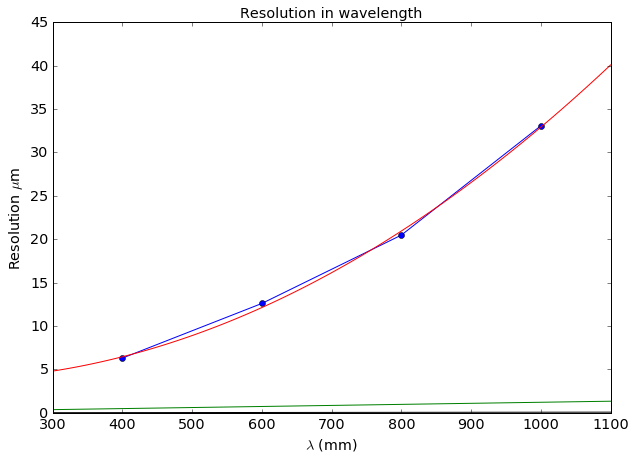

In [44]:
plt.plot(x_tofit,y_tofit,'o-')
plt.plot(thexfit,theyfit,'r-')
plt.plot(thexfit,theyfit2,'k-')
y2=ComputeWlRes(thexfit)
plt.plot(thexfit,y2,'g-')
plt.xlim(300.,1100.)
plt.title('Resolution in wavelength')
plt.xlabel("$\lambda$ (mm)")
plt.ylabel("Resolution $\mu$m")

# Computation of errors

In [45]:
errors_good=ComputeWlRes(wl)

In [46]:
wl_0=300.
err_0=ffit_resolution(wl_0)
all_wl_i = []
all_wl_i_err = []
all_wl_i.append(wl_0)
all_wl_i_err.append(err_0) 
NBPOINTS=100
wl_i_old=wl_0
err_i_old=err_0
for i in range(NBPOINTS):
    wl_i=wl_i_old+2.*err_i_old/(1-fderiv_resolution(wl_i_old))
    err_i=ffit_resolution(wl_i)
    wl_i=wl_i_old+err_i_old+err_i
    err_i=ffit_resolution(wl_i)
    all_wl_i.append(wl_i)
    all_wl_i_err.append(err_i) 
    wl_i_old=wl_i
    err_i_old=err_i

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: overflow encountered in double_scalars
  y = y * x + p[i]
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


In [47]:
all_wl_i =np.array(all_wl_i)
all_wl_i_err = np.array(all_wl_i_err)

In [48]:
selected_index=np.where(np.logical_and(all_wl_i>=310,all_wl_i<=1100))

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [49]:
print selected_index

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),)


In [50]:
wl_toplot=all_wl_i[selected_index]
wl_err_toplot=all_wl_i_err[selected_index]

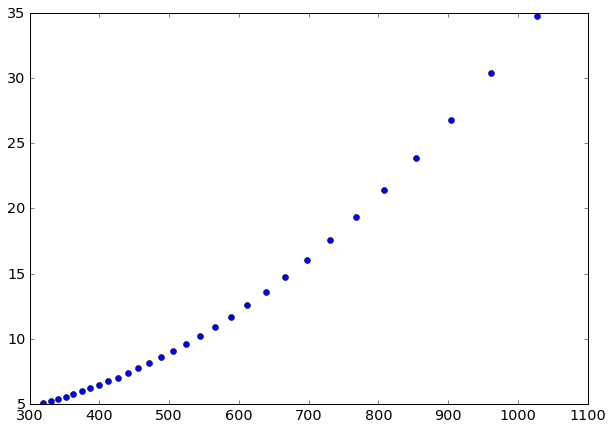

In [51]:
plt.plot(wl_toplot,wl_err_toplot,'o')

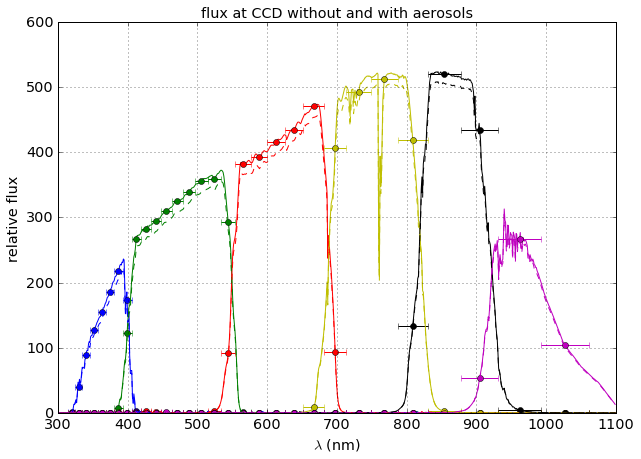

In [52]:
plt.plot(wl,fl1_u_rt,'b-')
interpol_b=interp1d(wl,fl1_u_rt)
y_b=interpol_b(wl_toplot)
plt.errorbar(wl_toplot,y_b,xerr=wl_err_toplot,fmt='bo')

plt.plot(wl,fl1_g_rt,'g-')
interpol_g=interp1d(wl,fl1_g_rt)
y_g=interpol_g(wl_toplot)
plt.errorbar(wl_toplot,y_g,xerr=wl_err_toplot,fmt='go')

plt.plot(wl,fl1_r_rt,'r-')
interpol_r=interp1d(wl,fl1_r_rt)
y_r=interpol_r(wl_toplot)
plt.errorbar(wl_toplot,y_r,xerr=wl_err_toplot,fmt='ro')



plt.plot(wl,fl1_i_rt,'y-')
interpol_i=interp1d(wl,fl1_i_rt)
y_i=interpol_i(wl_toplot)
plt.errorbar(wl_toplot,y_i,xerr=wl_err_toplot,fmt='yo')


plt.plot(wl,fl1_z_rt,'k-')
interpol_z=interp1d(wl,fl1_z_rt)
y_z=interpol_z(wl_toplot)
plt.errorbar(wl_toplot,y_z,xerr=wl_err_toplot,fmt='ko')


plt.plot(wl,fl1_y4_rt,'m-')
interpol_y4=interp1d(wl,fl1_y4_rt)
y_y4=interpol_y4(wl_toplot)
plt.errorbar(wl_toplot,y_y4,xerr=wl_err_toplot,fmt='mo')


plt.plot(wl,fl1_u_rt_aer,'b--')
plt.plot(wl,fl1_g_rt_aer,'g--')
plt.plot(wl,fl1_r_rt_aer,'r--')
plt.plot(wl,fl1_i_rt_aer,'y--')
plt.plot(wl,fl1_z_rt_aer,'k--')
plt.plot(wl,fl1_y4_rt_aer,'m--')



thetitle = 'flux at CCD without and with aerosols'
plt.title(thetitle)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('relative flux')
plt.legend(loc=1)
plt.grid(True)
plt.savefig("magnit.jpg")